## Artificial Intelligence
## L2 International, Univ. Bordeaux

### Lab #3, Supervised Learning (1)
Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function $f$ from the input to the output.

$ Y=f(X) $ 

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

$k$-Nearest Neighbors ($k$-NN)
The $k$-Nearest Neighbors algorithm ($k$-NN for short) is a very simple technique. The entire training dataset is stored. When a prediction is required, the $k$-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made. Once the neighbors are discovered, the summary prediction can be made by returning the most common outcome (for classification problems) or taking the average (for regression problems).

As usual, we need to import necessary python modules:

In [1]:
import pandas as pd
import numpy as np

Two additional modules for data visualization:

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

We will illustrate our first supervised learning algorithm using it for breast cancer prediction. For this purpose, we will load a related dataset which is included in the standard datasets of sklearn. Later, we will discuss how we can work with our own dataset.

In [3]:
from sklearn.datasets import load_breast_cancer

sklearn datasets are well formated. They come with a set of functions that can be used to get information about them or to visualise them:

In [4]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In the sequel, we will not consider all the dataset. We will explain concepts and  $k$-NN algorithm using only two columns (together with predicted class):

Note that function Categorical encodes the two classes as 0 and 1.

In [33]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

Now, we will split the dataset into two subsets: one for the training and the other for the test. For this, we will import the necessary function:

In [7]:
from sklearn.model_selection import train_test_split

We split the dataset into two subsets. The default ration for the test subset is 25%. However, we can modify it using parameter test_size.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 421 to 415
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   benign  143 non-null    uint8
dtypes: uint8(1)
memory usage: 6.3 KB


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 421 to 415
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean area         143 non-null    float64
 1   mean compactness  143 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [38]:
X.dtypes

mean area           float64
mean compactness    float64
dtype: object

In [39]:
y.dtypes

benign    uint8
dtype: object

In [46]:
y_test.astype(int)

,benign
421,1
47,0
292,1
186,0
414,0
...,...
232,1
413,1
514,0
244,0


In [48]:
y_test.dtypes

benign    uint8
dtype: object

Now, we can train our supervised learning model using $k$-NN:

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
                     
Once the model is trained, we can use it to predict the values for the test subset:

In [30]:
y_pred = knn.predict(X_test)

<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

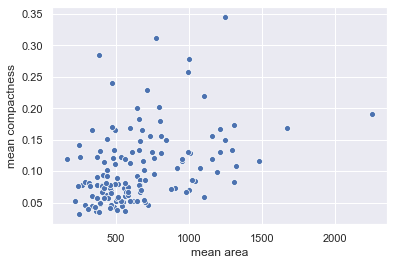

In [50]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    #hue='benign',
    data=X_test.join(y_test, how='outer')
)

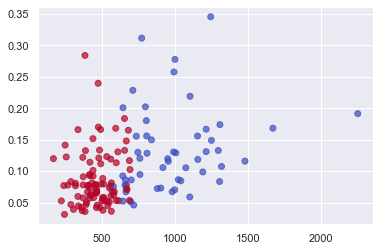

In [13]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

We can compute the confusion matrix:

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42 13]
 [ 9 79]]


End then, compute the accuracy of the model:

In [20]:
acc = np.sum(np.diag(cm))/np.sum(cm)
print('{:.2%}'.format(acc))

84.62%


k-nn is among the simplest supervised learning algorithms. Indeed, the only hyper-parameter to define k. Thus, we can write a very simple algorithm to find the best value for k:

In [21]:
def best_model_search(X_train, X_test, y_train, y_test, n=10, patience=3):
    k = 1
    best_acc = 0
    best_model = None
    while k <n and patience >0 :
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc = acc
            best_model = knn
        patience = patience -1
        k = k+1
    return best_model,k, best_acc

In [22]:
knn, k, acc = best_model_search(X_train, X_test, y_train, y_test, patience=10)

79.02%
79.02%
83.22%
80.42%
84.62%
83.22%
84.62%
82.52%
85.31%


In [24]:
print(k, '{:.2%}'.format(acc))

10 85.31%
